In [ ]:
import os
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

100-bird-species.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/100-bird-species.zip -d /content/100-bird-species

In [ ]:
data_dir = '/content/100-bird-species/'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)
print('No. of training classes: ', len(classes))

['birds.csv', 'test', 'valid', 'train', 'EfficientNetB0-525-(224 X 224)- 98.97.h5']
['FAN TAILED WIDOW', 'MIKADO  PHEASANT', 'OCELLATED TURKEY', 'WILSONS BIRD OF PARADISE', 'BLACK BAZA', 'GOULDIAN FINCH', 'WHITE BREASTED WATERHEN', 'SANDHILL CRANE', 'D-ARNAUDS BARBET', 'MALEO', 'FAIRY PENGUIN', 'GUINEA TURACO', 'COMMON POORWILL', 'INDIGO FLYCATCHER', 'ORANGE BRESTED BUNTING', 'SPLENDID WREN', 'RUBY CROWNED KINGLET', 'RED FACED WARBLER', 'PUNA TEAL', 'DOWNY WOODPECKER', 'TRICOLORED BLACKBIRD', 'IMPERIAL SHAQ', 'SRI LANKA BLUE MAGPIE', 'MILITARY MACAW', 'KAKAPO', 'RED CROSSBILL', 'PALM NUT VULTURE', 'SNOWY SHEATHBILL', 'CRESTED KINGFISHER', 'JANDAYA PARAKEET', 'GRANDALA', 'CREAM COLORED WOODPECKER', 'IBERIAN MAGPIE', 'CHESTNET BELLIED EUPHONIA', 'AUCKLAND SHAQ', 'COMMON IORA', 'HIMALAYAN BLUETAIL', 'ABBOTTS BABBLER', 'OYSTER CATCHER', 'AMERICAN WIGEON', 'WATTLED LAPWING', 'BALI STARLING', 'BANDED PITA', 'AZURE BREASTED PITTA', 'GOLDEN PHEASANT', 'ALBERTS TOWHEE', 'KING EIDER', 'COPPERY T

In [ ]:
ACC_files = os.listdir(data_dir + "/train/AFRICAN CROWNED CRANE")
print('No. of training examples for AFRICAN CROWNED CRANE:', len(ACC_files))
print(ACC_files[:5])

No. of training examples for AFRICAN CROWNED CRANE: 135
['002.jpg', '082.jpg', '110.jpg', '036.jpg', '034.jpg']


In [ ]:
BNG_files = os.listdir(data_dir + "/train/BLACK-NECKED GREBE")
print('No. of training examples for BLACK-NECKED GREBE:', len(BNG_files))
print(BNG_files[:5])

No. of training examples for BLACK-NECKED GREBE: 137
['002.jpg', '082.jpg', '110.jpg', '036.jpg', '034.jpg']


In [ ]:
img_height, img_width = 224, 224
num_labels = 525

In [ ]:
train_ds = ImageFolder(data_dir+'/train', transform=transforms.ToTensor())
print(train_ds.classes)

img, label = train_ds[0]
print(img.shape, label)
img

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

tensor([[[0.9333, 0.9294, 0.9333,  ..., 0.3490, 0.3255, 0.3137],
         [0.9333, 0.9294, 0.9333,  ..., 0.3176, 0.3255, 0.3373],
         [0.9294, 0.9255, 0.9294,  ..., 0.3216, 0.3412, 0.3255],
         ...,
         [0.3882, 0.4353, 0.4471,  ..., 0.1529, 0.1725, 0.1725],
         [0.4157, 0.4784, 0.4235,  ..., 0.1608, 0.1804, 0.1725],
         [0.4196, 0.4392, 0.4627,  ..., 0.1608, 0.1804, 0.1647]],

        [[0.9333, 0.9294, 0.9333,  ..., 0.3020, 0.2784, 0.2667],
         [0.9333, 0.9294, 0.9333,  ..., 0.2706, 0.2784, 0.2902],
         [0.9294, 0.9255, 0.9294,  ..., 0.2745, 0.2941, 0.2784],
         ...,
         [0.5412, 0.5804, 0.5843,  ..., 0.1529, 0.1725, 0.1725],
         [0.5686, 0.6235, 0.5608,  ..., 0.1686, 0.1804, 0.1725],
         [0.5725, 0.5843, 0.5961,  ..., 0.1686, 0.1804, 0.1647]],

        [[0.9020, 0.8980, 0.8941,  ..., 0.2549, 0.2235, 0.2039],
         [0.9020, 0.8980, 0.8941,  ..., 0.2235, 0.2235, 0.2353],
         [0.8902, 0.8863, 0.8902,  ..., 0.2196, 0.2471, 0.

Label:  ABBOTTS BABBLER (0)


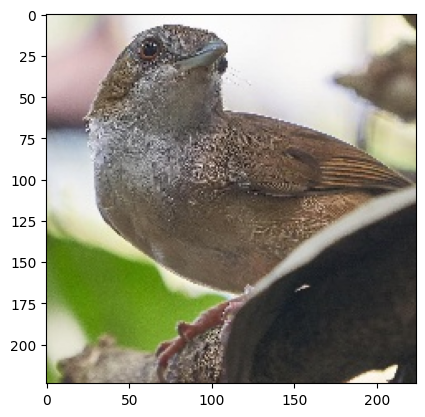

In [ ]:
def show_example(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

show_example(*train_ds[0])

In [ ]:
batch_size=128
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(torchvision.utils.make_grid(images, nrow=16).permute(1, 2, 0))
        break

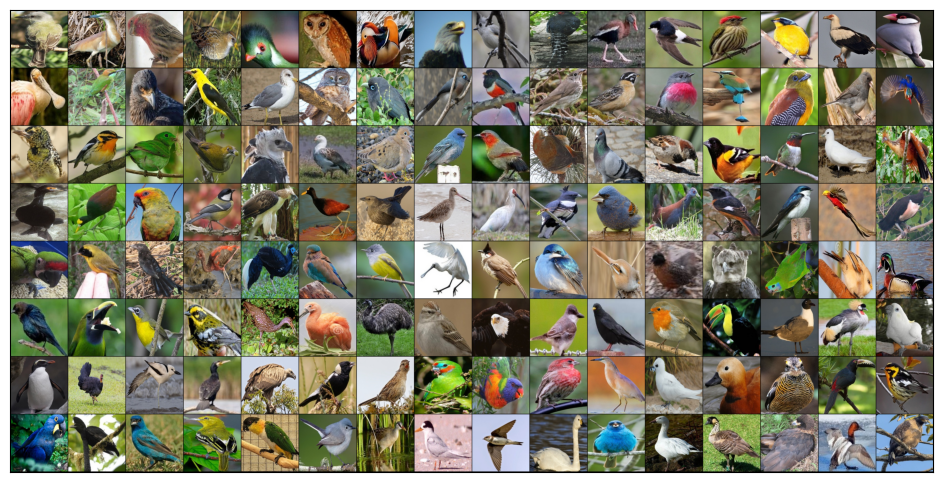

In [ ]:
show_batch(train_dl)